In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import pandas_datareader as pdr
import numpy as np
import datetime as dt

# Volatility
* Different ways to look at it
* Here we will use ATR (Average Time Range)

## What's volatility?
* volatility has a number of diffeent meaning
* we use it to realtion to price movement
* can be thought as the equivalent as risk

In [2]:
start = dt.datetime(2022,1,1)
data=pdr.get_data_yahoo("NFLX",start)

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,614.080017,602.049988,610.010010,602.440002,1995900,602.440002
2022-01-03,609.989990,590.559998,605.609985,597.369995,3067500,597.369995
2022-01-04,600.409973,581.599976,599.909973,591.150024,4393100,591.150024
2022-01-05,592.840027,566.880005,592.000000,567.520020,4148700,567.520020
2022-01-06,563.359985,542.010010,554.340027,553.289978,5711800,553.289978
...,...,...,...,...,...,...
2022-10-10,233.830002,224.229996,225.639999,229.979996,9991100,229.979996
2022-10-11,230.440002,213.699997,226.050003,214.289993,15282400,214.289993
2022-10-12,223.669998,212.639999,214.300003,220.869995,12952600,220.869995


In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,614.080017,602.049988,610.010010,602.440002,1995900,602.440002
2022-01-03,609.989990,590.559998,605.609985,597.369995,3067500,597.369995
2022-01-04,600.409973,581.599976,599.909973,591.150024,4393100,591.150024
2022-01-05,592.840027,566.880005,592.000000,567.520020,4148700,567.520020
2022-01-06,563.359985,542.010010,554.340027,553.289978,5711800,553.289978


## Formula
* TR=max(H-L,|H-C(p),|L-C(p)]
* ATR=1/n(summation TRi)

In [5]:
high_low=data['High']-data['Low'] #will always be positve as high - low 

In [6]:
high_cp=np.abs(data['High']-data['Close'].shift())

In [7]:
high_cp

Date
2021-12-31          NaN
2022-01-03     7.549988
2022-01-04     3.039978
2022-01-05     1.690002
2022-01-06     4.160034
                ...    
2022-10-10     9.080002
2022-10-11     0.460007
2022-10-12     9.380005
2022-10-13    13.600006
2022-10-14     6.290009
Length: 199, dtype: float64

In [8]:
low_cp=np.abs(data['Low']-data['Close']).shift()

In [9]:
low_cp

Date
2021-12-31          NaN
2022-01-03     0.390015
2022-01-04     6.809998
2022-01-05     9.550049
2022-01-06     0.640015
                ...    
2022-10-10     0.470001
2022-10-11     5.750000
2022-10-12     0.589996
2022-10-13     8.229996
2022-10-14    20.779999
Length: 199, dtype: float64

In [10]:
df=pd.concat([high_low,high_cp,low_cp],axis=1)

In [11]:
df

,0,1,2
Date,,,
2021-12-31,12.030029,NaN,NaN
2022-01-03,19.429993,7.549988,0.390015
2022-01-04,18.809998,3.039978,6.809998
2022-01-05,25.960022,1.690002,9.550049
2022-01-06,21.349976,4.160034,0.640015
...,...,...,...
2022-10-10,9.600006,9.080002,0.470001
2022-10-11,16.740005,0.460007,5.750000
2022-10-12,11.029999,9.380005,0.589996


In [12]:
df.head()

,0,1,2
Date,,,
2021-12-31,12.030029,NaN,NaN
2022-01-03,19.429993,7.549988,0.390015
2022-01-04,18.809998,3.039978,6.809998
2022-01-05,25.960022,1.690002,9.550049
2022-01-06,21.349976,4.160034,0.640015


In [13]:
true_range=np.max(df,axis=1)

In [14]:
true_range

Date
2021-12-31    12.030029
2022-01-03    19.429993
2022-01-04    18.809998
2022-01-05    25.960022
2022-01-06    21.349976
                ...    
2022-10-10     9.600006
2022-10-11    16.740005
2022-10-12    11.029999
2022-10-13    22.740005
2022-10-14    20.779999
Length: 199, dtype: float64

In [15]:
df

,0,1,2
Date,,,
2021-12-31,12.030029,NaN,NaN
2022-01-03,19.429993,7.549988,0.390015
2022-01-04,18.809998,3.039978,6.809998
2022-01-05,25.960022,1.690002,9.550049
2022-01-06,21.349976,4.160034,0.640015
...,...,...,...
2022-10-10,9.600006,9.080002,0.470001
2022-10-11,16.740005,0.460007,5.750000
2022-10-12,11.029999,9.380005,0.589996


In [16]:
average_true_range=true_range.rolling(14).mean()

In [17]:
average_true_range

Date
2021-12-31          NaN
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
                ...    
2022-10-10    12.346428
2022-10-11    12.712142
2022-10-12    12.868571
2022-10-13    13.419999
2022-10-14    14.212142
Length: 199, dtype: float64

<IPython.core.display.Javascript object>


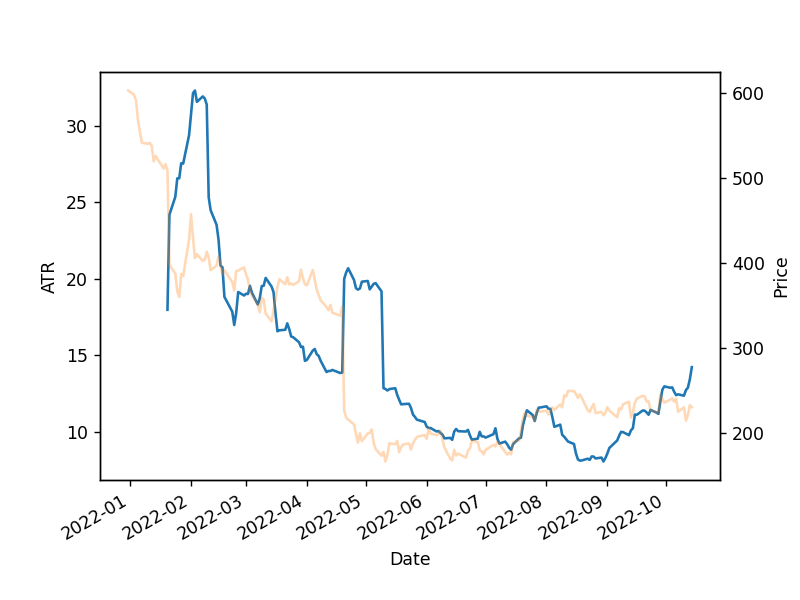

Text(0, 0.5, 'Price')

In [18]:
fig,ax=plt.subplots()
average_true_range.plot(ax=ax)
ax2=data['Close'].plot(ax=ax,secondary_y=True,alpha=0.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")